# Scikit-Learn

## Exploratory analysis

In [2]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import (
    datasets,
    decomposition,
    linear_model,
    metrics,
    model_selection,
    naive_bayes,
    pipeline,
)

In [3]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # Version tested on sklearn.__version__ == 1.5.x

1.5.2


---

### Classification (digits)

Let's look at the classification model performance in terms of precision and recall.

#### Data loading

https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset

In [4]:
digits = datasets.load_digits()

In [5]:
# Flatten the images
n_samples = len(digits.images)
print(digits.images.shape)

data = digits.images.reshape([n_samples, -1])

print(data.shape, digits.target.shape)

(1797, 8, 8)
(1797, 64) (1797,)


Randomly select the training and test dataset.

<span style="color:red">Implement your solution below</span>

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=42)

#### Train the models

Train the model using, e.g., the [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

<span style="color:red">Implement your solution below</span>

In [7]:
classifier = naive_bayes.GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_pred

array([6, 9, 3, 7, 2, 2, 5, 8, 5, 2, 1, 1, 7, 0, 4, 8, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 2, 5, 6, 0, 9, 0, 0, 1, 7, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 3, 5, 7, 7, 0, 4, 5, 5, 5, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 1, 3, 5, 2, 9, 0, 4, 7, 4, 3, 5, 3, 1, 8, 5, 7, 4, 2,
       7, 7, 7, 6, 1, 9, 8, 7, 8, 7, 2, 6, 9, 4, 0, 7, 8, 7, 5, 8, 5, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 8, 9, 6, 9, 0, 6, 5, 6, 6, 0,
       6, 4, 2, 3, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 8, 1, 3,
       7, 7, 2, 8, 3, 9, 8, 0, 3, 8, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 9, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 8, 8, 6, 0, 4, 5,
       8, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 9, 5, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 4, 1, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 8, 7, 8, 6, 0, 8, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 7, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 2,

#### Evaluate

Evaluate with the [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Then give a more complete result, including precision, recall and f1-score with the method [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

<span style="color:red">Implement your solution below</span>

In [8]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

Accuracy: 0.85
{'0': {'precision': 1.0, 'recall': 0.9811320754716981, 'f1-score': 0.9904761904761905, 'support': 53.0}, '1': {'precision': 0.8604651162790697, 'recall': 0.74, 'f1-score': 0.7956989247311828, 'support': 50.0}, '2': {'precision': 0.8611111111111112, 'recall': 0.6595744680851063, 'f1-score': 0.7469879518072289, 'support': 47.0}, '3': {'precision': 0.9534883720930233, 'recall': 0.7592592592592593, 'f1-score': 0.845360824742268, 'support': 54.0}, '4': {'precision': 0.9807692307692307, 'recall': 0.85, 'f1-score': 0.9107142857142857, 'support': 60.0}, '5': {'precision': 0.9393939393939394, 'recall': 0.9393939393939394, 'f1-score': 0.9393939393939394, 'support': 66.0}, '6': {'precision': 0.8947368421052632, 'recall': 0.9622641509433962, 'f1-score': 0.9272727272727272, 'support': 53.0}, '7': {'precision': 0.72, 'recall': 0.9818181818181818, 'f1-score': 0.8307692307692308, 'support': 55.0}, '8': {'precision': 0.5652173913043478, 'recall': 0.9069767441860465, 'f1-score': 0.6964285

#### Confusion matrix

Use the class [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
to display the confusion matrix.

Briefly comment on the results.

Note that the `.confusion_matrix` attribute of the created object allows to obtain the confusion matrix in the form of an array.

<span style="color:red">Implement your solution below</span>

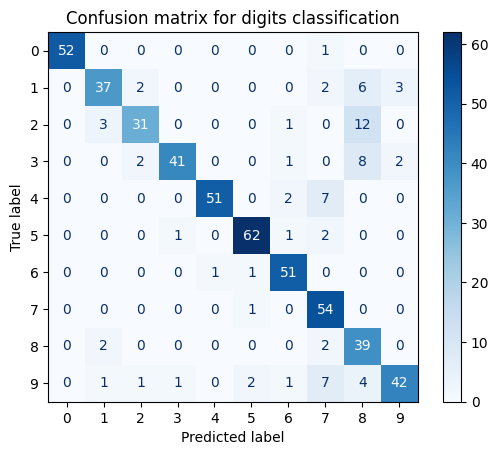

Confusion matrix array:
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0  1  0 62  1  2  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  2 39  0]
 [ 0  1  1  1  0  2  1  7  4 42]]


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix for digits classification")
plt.show()

conf_matrix_array = disp.confusion_matrix
print("Confusion matrix array:")
print(conf_matrix_array)

#### Error visualization

Identify the most confusing cases.

Identify misclassified instances for the lowest f1-scoring cipher class and visualize them with the code below.

You may use the function [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to find the index of the concerned instances.

In [10]:
def plot_digit(idx, xs, ys=None, pred_ys=None):
    if ys is not None:
        print(f"Digit value:\t{ys[idx]}")
    if pred_ys is not None:
        print(f"Prediction:\t{pred_ys[idx]}")

    plt.figure(figsize=(3, 3))
    plt.imshow(
        xs[idx].reshape(8, -1),
        cmap=plt.cm.gray_r,
        interpolation="nearest",
    )
    plt.show()

<span style="color:red">Implement your solution below</span>

f1 scores:  {0: 0.9904761904761905, 1: 0.7956989247311828, 2: 0.7469879518072289, 3: 0.845360824742268, 4: 0.9107142857142857, 5: 0.9393939393939394, 6: 0.9272727272727272, 7: 0.8307692307692308, 8: 0.6964285714285714, 9: 0.7924528301886793}
Class with the lowest F1-score: 8
Misclassified instances for class 8: [ 92 240 258 289]
Visualizing misclassified instances for class 8:
Digit value:	8
Prediction:	1


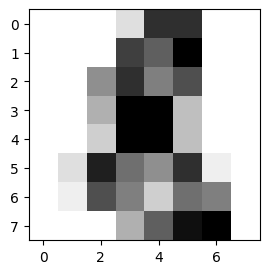

Digit value:	8
Prediction:	1


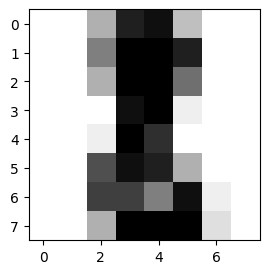

Digit value:	8
Prediction:	7


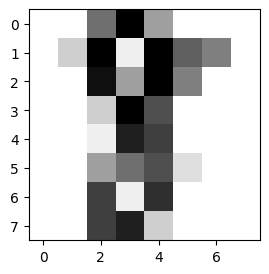

Digit value:	8
Prediction:	7


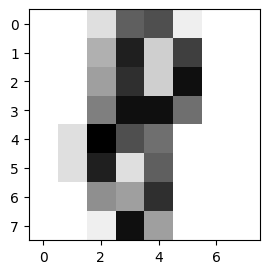

In [11]:
f1_scores = {int(label): report[str(label)]['f1-score'] for label in report if label.isdigit()}
print("f1 scores: ", f1_scores)
lowest_f1_class = min(f1_scores, key=f1_scores.get)
print(f"Class with the lowest F1-score: {lowest_f1_class}")

misclassified_idxs = np.where((y_test == lowest_f1_class) & (y_pred != y_test))[0]
print(f"Misclassified instances for class {lowest_f1_class}:", misclassified_idxs)

print(f"Visualizing misclassified instances for class {lowest_f1_class}:")
for idx in misclassified_idxs[:5]:
    plot_digit(idx, X_test, y_test, y_pred)

---

### PCA

Try to reduce the number of features through the ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)), by choosing, e.g., the 10 first principal components.

#### PCA and training/evaluation data selection

<span style="color:red">Implement your solution below</span>

In [12]:
pca = decomposition.PCA(n_components=10)
data_pca = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data_pca, digits.target, test_size=0.3, random_state=42)

#### Model training

<span style="color:red">Implement your solution below</span>

In [13]:
classifier = naive_bayes.GaussianNB()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_pred

array([6, 9, 3, 7, 2, 2, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 5, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 7, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 9, 2, 9, 1, 4, 4, 4, 3, 5, 2, 1, 8, 5, 1, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 9, 7, 2, 7, 5, 8, 7, 5,
       7, 1, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 7, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 3, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 8, 6, 0, 3, 2, 3, 6, 7, 1, 9, 2, 4, 7, 6, 5, 8, 5,
       5, 1, 9, 2, 8, 8, 1, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 9, 8, 5, 3, 6, 0, 4, 1, 0, 0, 9, 6, 5, 9, 7, 3, 5,
       9, 9, 9, 1, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 2,

#### Evaluation

<span style="color:red">Implement your solution below</span>

Accuracy after PCA: 0.90
Classification report after PCA:


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.79      0.84      0.82        50
           2       0.88      0.98      0.93        47
           3       0.92      0.85      0.88        54
           4       0.98      0.97      0.97        60
           5       0.92      0.85      0.88        66
           6       1.00      0.96      0.98        53
           7       0.91      0.95      0.93        55
           8       0.81      0.79      0.80        43
           9       0.77      0.86      0.82        59

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.90      0.90      0.90       540



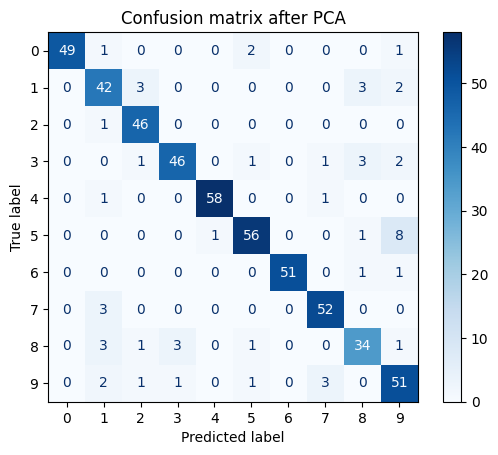

Confusion matrix array after PCA:
[[49  1  0  0  0  2  0  0  0  1]
 [ 0 42  3  0  0  0  0  0  3  2]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 46  0  1  0  1  3  2]
 [ 0  1  0  0 58  0  0  1  0  0]
 [ 0  0  0  0  1 56  0  0  1  8]
 [ 0  0  0  0  0  0 51  0  1  1]
 [ 0  3  0  0  0  0  0 52  0  0]
 [ 0  3  1  3  0  1  0  0 34  1]
 [ 0  2  1  1  0  1  0  3  0 51]]


In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA: {accuracy:.2f}")

print("Classification report after PCA:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion matrix after PCA")
plt.show()

conf_matrix_array = disp.confusion_matrix
print("Confusion matrix array after PCA:")
print(conf_matrix_array)

---

### Cross-Validation

#### Data preparation

Use the function [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to implement cross-validation.

You may choose to do 10 splits (`cv=10`).

Choose as *scoring* `"f1_weighted"`, then the function will return the corresponding scores in an array.

By way of example and in order to be able to compare the results with the previous ones, the first application will be done on the entire dataset (which is usually not recommended).

<span style="color:red">Implement your solution below</span>

In [15]:
from sklearn.model_selection import cross_val_score

SCORINGS = "f1_weighted"

classifier = naive_bayes.GaussianNB()

cv_scores = cross_val_score(classifier, data, digits.target, cv=10, scoring=SCORINGS)

print("Cross-validation F1 scores (weighted):", cv_scores)

Cross-validation F1 scores (weighted): [0.74643939 0.80864546 0.90456151 0.68155889 0.74197066 0.83962727
 0.86848612 0.86512307 0.82646416 0.81156665]


Show the results with a [`plt.bar`] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) which includes an error bar `yerr` equal to 1 [standard deviation](https://numpy.org/doc/stable/reference/generated/numpy.std.html), as well as in a [`boxplot`](https://matplotlib.org/stable/api/_as_gen/ matplotlib.pyplot.boxplot.html).

<span style="color:red">Implement your solution below</span>

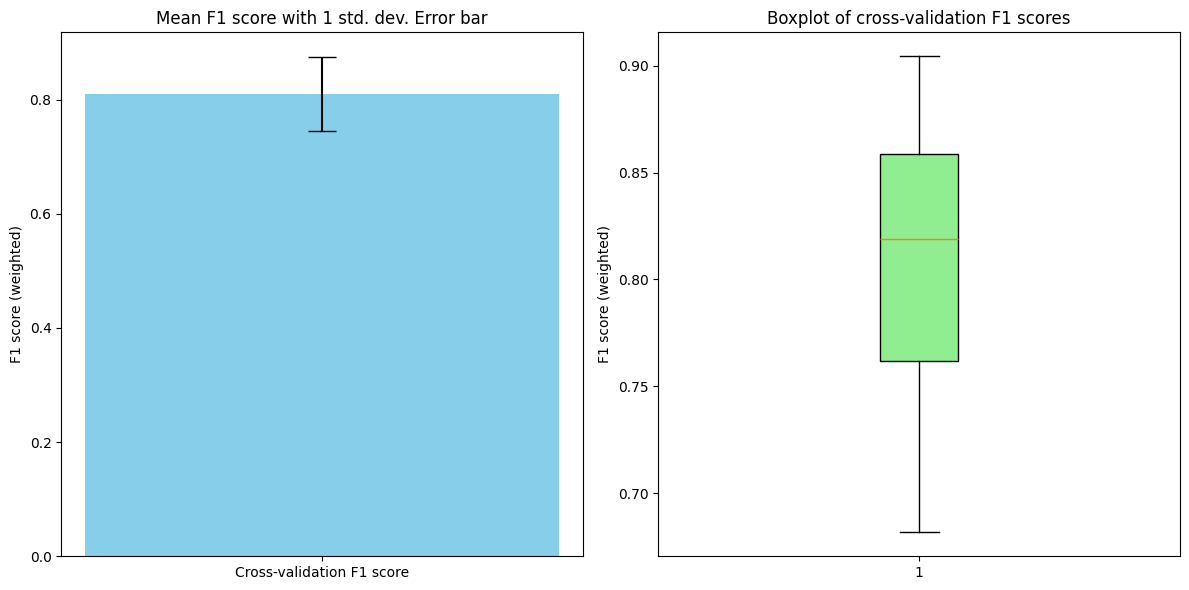

In [16]:
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(1, mean_score, yerr=std_dev, color="skyblue", capsize=10)
plt.xticks([1], ["Cross-validation F1 score"])
plt.ylabel("F1 score (weighted)")
plt.title("Mean F1 score with 1 std. dev. Error bar")

plt.subplot(1, 2, 2)
plt.boxplot(cv_scores, vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.ylabel("F1 score (weighted)")
plt.title("Boxplot of cross-validation F1 scores")

plt.tight_layout()
plt.show()

---

### Grid Search

This time, we are going to use cross-validation for one of its primary use: to validate the choice of hyperparameters.

We will use the class
[`model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best number of main components for the PCA.

This class makes it possible to test several hyperparameters (stored in a dictionary) and to test them via cross-validation (hence the CV in the name).

To do this, we no longer need to worry about creating the different subsets, the `GridSearchCV` class does it for us.

In [17]:
param_grid = {"pca__n_components": [1, 2, 5, 10, 20, 30, 40, 60]}

We're going to use a [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to do PCA compression and training with the model together, which will allow us to modify the hyperparameters at any step of the process through a single command.

We will have to use the exact names of the hyperparameters to modify in the dictionary, preceded by the name of the module and a double *underscore* (e.g., here: `"pca__"`), in order to be able to assign them to the right step of the `pipeline`.

<span style="color:red">Implement your solution below</span>

In [18]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ("pca", decomposition.PCA()),
    ("classifier", naive_bayes.GaussianNB())
])

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the gridsearch using the pipeline and fit the model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="f1_weighted")

grid_search.fit(data, digits.target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('classifier', GaussianNB())]),
             param_grid={'pca__n_components': [1, 2, 5, 10, 20, 30, 40, 60]},
             scoring='f1_weighted')

In [20]:
# Print the best prediction score obtained
# and its corresponding hyperparameter value
best_score = grid_search.best_score_
best_n_components = grid_search.best_params_["pca__n_components"]

print(f"Best F1 score (weighted): {best_score:.2f}")
print(f"Best number of PCA components: {best_n_components}")

Best F1 score (weighted): 0.91
Best number of PCA components: 30


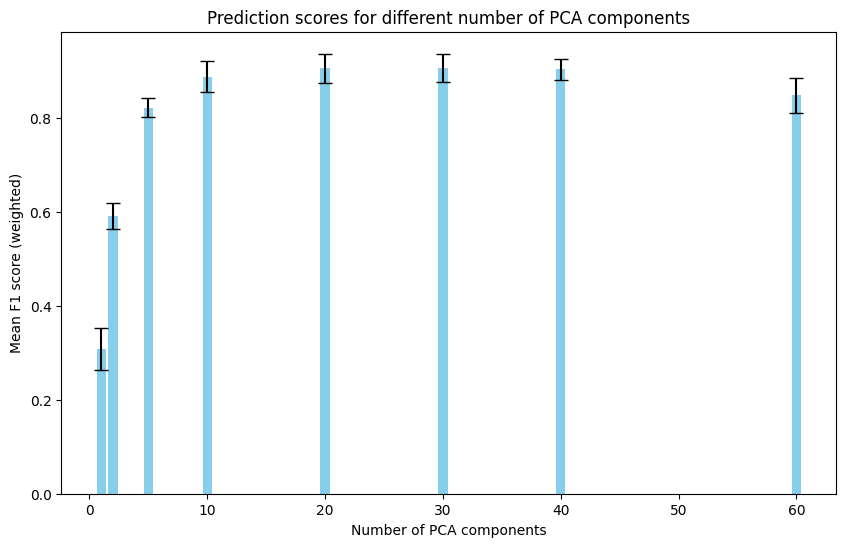

In [21]:
# Plot a bar plot (or boxplot) showing the different prediction scores
# for each tested hyperparameter
# (including the error bars if bar plots are chosen)
results = grid_search.cv_results_
mean_test_scores = results["mean_test_score"]
std_test_scores = results["std_test_score"]

plt.figure(figsize=(10, 6))
plt.bar(param_grid["pca__n_components"], mean_test_scores, yerr=std_test_scores, 
        color="skyblue", capsize=5)
plt.xlabel("Number of PCA components")
plt.ylabel("Mean F1 score (weighted)")
plt.title("Prediction scores for different number of PCA components")
plt.show()


## Further exercises

Using the `.predict_proba` method of` linear_model.LogisticRegression`, use the result of the prediction to select a particular threshold (*threshold*) to influence the classification performances.

*   Can you get 100% [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)?
*   Can you get 100% of [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)?
*   Measure the values of [f1-scores](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and comment.
*   Plot the [ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) from multiple threshold values.
*   Compare the [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) (area under the ROC curve) of the `linear_model.LogisticRegression` and of `naive_bayes. GaussianNB()`.

<span style="color:red">Implement your solution below and comment briefly</span>

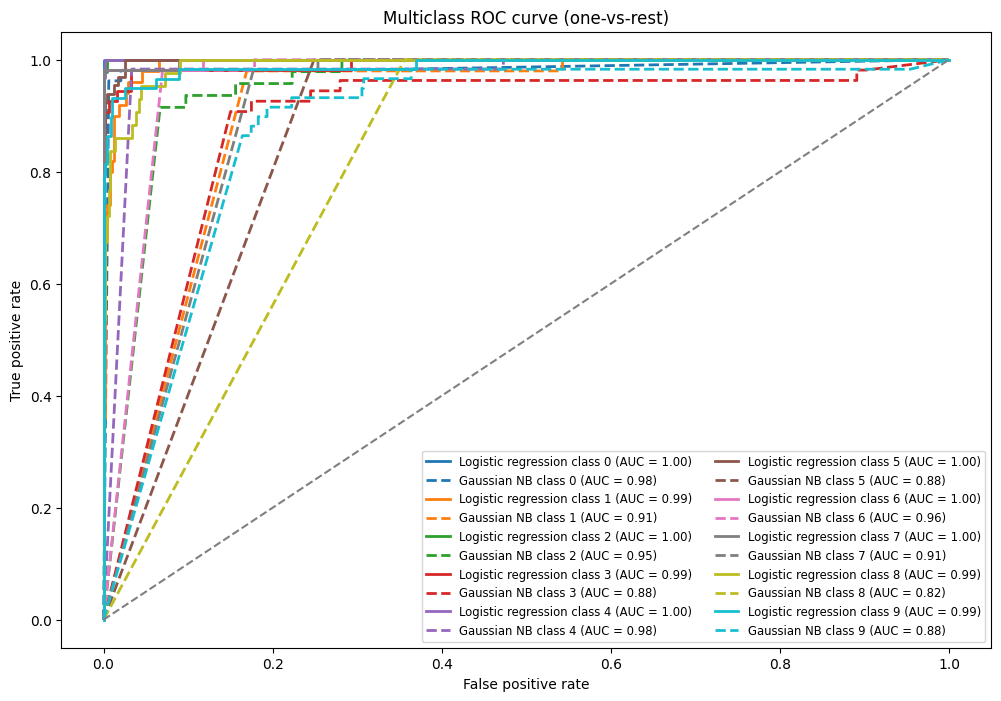

Logistic regression classification report:
              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99        53
     Class 1       0.88      0.86      0.87        50
     Class 2       0.96      1.00      0.98        47
     Class 3       0.88      0.93      0.90        54
     Class 4       0.98      0.97      0.97        60
     Class 5       0.95      0.94      0.95        66
     Class 6       0.98      0.98      0.98        53
     Class 7       0.95      0.98      0.96        55
     Class 8       0.77      0.86      0.81        43
     Class 9       0.93      0.90      0.91        59

   micro avg       0.93      0.94      0.94       540
   macro avg       0.93      0.94      0.93       540
weighted avg       0.93      0.94      0.94       540
 samples avg       0.92      0.94      0.93       540

Gaussian naive bayes classification report:
              precision    recall  f1-score   support

     Class 0       0.88      0.96      0.92  

/home/petko/uni/t_2/HOML/m1-hands-on-machine-learning/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/petko/uni/t_2/HOML/m1-hands-on-machine-learning/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

n_classes = len(np.unique(digits.target))

y_test_binarized = label_binarize(y_test, classes=range(n_classes))
y_train_binarized = label_binarize(y_train, classes=range(n_classes))

log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
nb_clf = OneVsRestClassifier(GaussianNB())

log_reg.fit(X_train, y_train_binarized)
nb_clf.fit(X_train, y_train_binarized)

y_proba_log_reg = log_reg.predict_proba(X_test)
y_proba_nb = nb_clf.predict_proba(X_test)

fpr_log_reg, tpr_log_reg, roc_auc_log_reg = {}, {}, {}
fpr_nb, tpr_nb, roc_auc_nb = {}, {}, {}

for i in range(n_classes):
    fpr_log_reg[i], tpr_log_reg[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_proba_log_reg[:, i])
    roc_auc_log_reg[i] = metrics.auc(fpr_log_reg[i], tpr_log_reg[i])

    fpr_nb[i], tpr_nb[i], _ = metrics.roc_curve(y_test_binarized[:, i], y_proba_nb[:, i])
    roc_auc_nb[i] = metrics.auc(fpr_nb[i], tpr_nb[i])

plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors
for i in range(n_classes):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], color=colors[i], lw=2,
             label=f"Logistic regression class {i} (AUC = {roc_auc_log_reg[i]:.2f})")
    plt.plot(fpr_nb[i], tpr_nb[i], color=colors[i], linestyle="--", lw=2,
             label=f"Gaussian NB class {i} (AUC = {roc_auc_nb[i]:.2f})")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Multiclass ROC curve (one-vs-rest)")
plt.legend(loc="lower right", ncol=2, fontsize='small')
plt.show()

y_pred_log_reg = log_reg.predict(X_test)
print("Logistic regression classification report:")
print(metrics.classification_report(y_test_binarized, y_pred_log_reg, target_names=[f"Class {i}" for i in range(n_classes)]))

y_pred_nb = nb_clf.predict(X_test)
print("Gaussian naive bayes classification report:")
print(metrics.classification_report(y_test_binarized, y_pred_nb, target_names=[f"Class {i}" for i in range(n_classes)]))


---